# Portrait plot using Matplotlib 

- Generate a static image of Portrait plot (with or without triangles) using Matplotlib.
- Author: Jiwoo Lee (2021.07)
- Last update: 2021.08

## 1. Read data from JSON files

Input data for portrait plot is expected as a set a (stacked or list of) 2-d numpy array(s) with list of strings for x and y axes labels. 

### 1.1 Provide PMP output JSON files

In [1]:
import glob
import os
import numpy as np

In [2]:
mip = 'cmip6'
data_version = "v20201008"
json_dir = '/Users/lee1043/Documents/Research/PMP/mean_climate/json_files/'

In [3]:
json_list = sorted(glob.glob(os.path.join(json_dir, '*' + mip + '*' + data_version + '.json')))
for json_file in json_list:
    print(json_file.split('/')[-1])

pr.cmip6.historical.regrid2.2p5x2p5.v20201008.json
psl.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rlds.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rltcre.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rlus.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rlut.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rlutcs.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rsds.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rsdt.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rstcre.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rsus.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rsut.cmip6.historical.regrid2.2p5x2p5.v20201008.json
rsutcs.cmip6.historical.regrid2.2p5x2p5.v20201008.json
sfcWind.cmip6.historical.regrid2.2p5x2p5.v20201008.json
ta-200.cmip6.historical.regrid2.2p5x2p5.v20201008.json
ta-850.cmip6.historical.regrid2.2p5x2p5.v20201008.json
tas.cmip6.historical.regrid2.2p5x2p5.v20201008.json
ts.cmip6.historical.regrid2.2p5x2p5.v20201008.json
ua-200.cmip6.historical.regrid2.2p5x2

### 1.2 Define statistics and regions to extract from the above JSON files

In [4]:
stats = ['rms_xyt', 'rms_xy', 'rmsc_xy', 'bias_xy']
regions = ['global', 'TROPICS', 'NHEX', 'SHEX']

### 1.3 Extract data from JSON files

Use `read_mean_clim_json_files` function to extract data from the above JSON files.

#### Parameters
- `json_list`: list of string, where each element is for path/file for PMP output JSON files
- `stats`: list of string, where each element is statistic to extract from the JSON
- `regions`: list of string, where each element is region to extract from the JSON
- `mip`: string, category for mip, e.g., 'cmip6'.  Optional
- `debug`: bool, default=False, enable few print statements to help debug

#### Returns
- `df_dict`: dictionary that has `[stat][season][region]` hierarchy structure storing pandas dataframe for metric numbers (Rows: models, Columns: variables (i.e., 2d array)
- `var_list`: list of string, all variables from JSON files
- `var_unit_list`: list of string, all variables and its units from JSON files

In [5]:
from pcmdi_metrics.graphics import read_mean_clim_json_files

df_dict, var_list, var_unit_list = read_mean_clim_json_files(json_list, stats, regions, mip=mip)

In [6]:
print('var_list:', var_list)
print('var_unit_list:', var_unit_list)

var_list: ['pr', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdt', 'rstcre', 'rsus', 'rsut', 'rsutcs', 'sfcWind', 'zg-500', 'ta-200', 'ta-850', 'tas', 'ts', 'ua-200', 'ua-850', 'uas', 'va-200', 'va-850', 'vas']
var_unit_list: ['pr [kg m-2 s-1]', 'psl [Pa]', 'rlds [W m-2]', 'rltcre [W m-2]', 'rlus [W m-2]', 'rlut [W m-2]', 'rlutcs [W m-2]', 'rsds [W m-2]', 'rsdt [W m-2]', 'rstcre [W m-2]', 'rsus [W m-2]', 'rsut [W m-2]', 'rsutcs [W m-2]', 'sfcWind [m s-1]', 'zg-500 [K]', 'ta-200 [K]', 'ta-850 [K]', 'tas [K]', 'ts [m s-1]', 'ua-200 [m s-1]', 'ua-850 [m s-1]', 'uas [m s-1]', 'va-200 [m s-1]', 'va-850 [m s-1]', 'vas [m]']


In [7]:
df_dict['rms_xy']['djf']['global']

,mip,model,run,model_run,pr,psl,rlds,rltcre,rlus,rlut,...,ta-200,ta-850,tas,ts,ua-200,ua-850,uas,va-200,va-850,vas
0,cmip6,ACCESS-CM2,r1i1p1,ACCESS-CM2_r1i1p1,1.655,251.612,11.516,8.531,10.560,11.011,...,1.336,2.279,2.571,4.084,1.371,1.020,1.502,0.759,0.770,22.140
1,cmip6,ACCESS-ESM1-5,r1i1p1,ACCESS-ESM1-5_r1i1p1,1.764,218.539,10.544,7.374,10.375,10.906,...,1.312,2.035,2.191,3.298,1.435,0.948,1.692,0.855,0.795,32.504
2,cmip6,AWI-ESM-1-1-LR,r1i1p1,AWI-ESM-1-1-LR_r1i1p1,1.935,211.132,14.760,8.937,12.534,11.649,...,NaN,1.880,2.217,4.037,1.741,1.318,2.291,1.038,1.022,NaN
3,cmip6,BCC-CSM2-MR,r1i1p1,BCC-CSM2-MR_r1i1p1,1.691,226.331,13.009,7.358,11.003,9.968,...,NaN,2.557,2.400,NaN,NaN,1.212,NaN,NaN,0.977,NaN
4,cmip6,BCC-ESM1,r1i1p1,BCC-ESM1_r1i1p1,1.601,248.693,14.468,8.406,12.980,12.735,...,1.916,3.069,2.998,4.574,1.860,1.275,2.000,1.090,1.102,NaN
5,cmip6,CAMS-CSM1-0,r1i1p1,CAMS-CSM1-0_r1i1p1,1.667,173.883,19.617,8.405,14.617,11.516,...,NaN,3.269,3.661,NaN,NaN,1.790,NaN,NaN,1.464,NaN
6,cmip6,CESM2,r1i1p1,CESM2_r1i1p1,1.222,202.799,11.020,6.975,9.603,7.892,...,1.172,1.446,1.824,3.130,1.398,NaN,1.763,0.758,NaN,NaN
7,cmip6,CESM2-FV2,r1i1p1,CESM2-FV2_r1i1p1,1.375,235.556,12.341,7.822,10.688,8.717,...,1.790,1.796,2.116,3.950,2.119,NaN,2.055,0.960,NaN,NaN
8,cmip6,CESM2-WACCM,r1i1p1,CESM2-WACCM_r1i1p1,1.205,204.362,10.554,6.743,9.189,7.656,...,NaN,1.358,1.720,2.988,1.555,NaN,1.582,0.755,NaN,NaN
9,cmip6,CESM2-WACCM-FV2,r1i1p1,CESM2-WACCM-FV2_r1i1p1,1.502,190.828,12.033,7.872,10.554,9.241,...,1.658,1.689,2.105,2.882,1.916,NaN,1.780,0.870,NaN,NaN


In [8]:
var_list = ["pr", "psl", "rltcre", "rlut", "rstcre", "rsut", "ta-200", "ta-850", "tas", "ts",
            "ua-200", "ua-850", "va-200", "va-850", "zg-500"]

In [9]:
data_djf = df_dict['rms_xy']['djf']['global'][var_list].to_numpy()
data_mam = df_dict['rms_xy']['mam']['global'][var_list].to_numpy()
data_jja = df_dict['rms_xy']['jja']['global'][var_list].to_numpy()
data_son = df_dict['rms_xy']['son']['global'][var_list].to_numpy()
model_names = df_dict['rms_xyt']['ann']['global']['model'].tolist()
data_all = np.stack([data_djf, data_mam, data_jja, data_son])
print('data.shape:', data_all.shape)
print('len(var_list): ', len(var_list))
print('len(model_names): ', len(model_names))

xaxis_labels = var_list
yaxis_labels = model_names

data.shape: (4, 40, 15)
len(var_list):  15
len(model_names):  40


### 1.4 Normalize each column by its median

Use `normalize_by_median` function.

#### Parameters
- `data`: 2d numpy array
- `axis`: 0 (normalize each column) or 1 (normalize each row), default=0 

#### Return
- `data_nor`: 2d numpy array

In [10]:
from pcmdi_metrics.graphics import normalize_by_median

data_djf_nor = normalize_by_median(data_djf)
data_mam_nor = normalize_by_median(data_mam)
data_jja_nor = normalize_by_median(data_jja)
data_son_nor = normalize_by_median(data_son)

In [11]:
data_all_nor = np.stack([data_djf_nor, data_mam_nor, data_jja_nor, data_son_nor])
data_all_nor.shape

(4, 40, 15)

## 2. Matplotlib-based PMP Visualization Function

In [12]:
from pcmdi_metrics.graphics import portrait_plot

<p id="parameters"></p>

Parameters
----------
- `data`: 2d numpy array, a list of 2d numpy arrays, or a 3d numpy array (i.e. stacked 2d numpy arrays)
- `xaxis_labels`: list of strings, labels for xaixs. Number of list element must consistent to x-axis, or 0 (empty list) to turn off xaxis tick labels
- `yaxis_labels`: list of strings, labels for yaxis. Number of list element must consistent to y-axis, or 0 (empty list) to turn off yaxis tick labels
- `fig`: [`matplotlib.figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) instance to which the portrait plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `ax`: [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/axes_api.html) instance to which the portrait plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `annotate`: bool, default=False, add annotating text if true, but work only for heatmap style map (i.e., no triangles)
- `annotate_data`: 2d numpy array, default=None. If None, the image's data is used.  Optional. 
- `annotate_fontsize`: number (int/float), default=15. Font size for annotation
- `figsize`: tuple of two numbers, default=(12, 10), figure size
- `vrange`: tuple of two numbers, range of value for colorbar.  Optional.
- `xaxis_fontsize`: number, default=15, font size for xaxis tick labels
- `yaxis_fontsize`: number, default=15, font size for yaxis tick labels
- `cmap`: string, default="RdBu_r", name of matplotlib colormap
- `cmap_bounds`: list of numbers.  If given, discrete colors are applied.  Optional.
- `cbar_label`: string, default=None, label for colorbar
- `cbar_label_fontsize`: number, default=15, font size for colorbar labels
- `cbar_tick_fontsize`: number, default=12, font size for colorbar tick labels
- `cbar_kw`: A dictionary with arguments to [`matplotlib.Figure.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html).  Optional.
- `missing_color`: color, default="grey", [`matplotlib.axes.Axes.set_facecolor`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_facecolor.html) parameter
- `invert_yaxis`: bool, default=True, place y=0 at top on the plot
- `box_as_square`: bool, default=False, make each box as square
- `legend_on`: bool, default=False, show legend (only for 2 or 4 triangles portrait plot)
- `legend_labels`: list of strings, legend labels for triangls
- `legend_box_xy`: tuple of numbers, position of legend box's upper-left corner (lower-left if `invert_yaxis=False`)
- `legend_box_size`: number, size of legend box
- `logo_rect`: sequence of float. The dimensions [left, bottom, width, height] of the new Axes. All quantities are in fractions of figure width and height.  Optional
- `logo_off`: bool, default=False, turn off PMP logo
- `debug`: bool, default=False, if true print more message when running that help debugging

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis
- `cbar`: matplotlib component for colorbar

## 3. Plot

## 3.1 Portrait Plot with 4 Triangles (4 seasons)

- data order is clockwise from top: top, right, bottom, left

Text(0.5, 1.0, 'Seasonal climatology RMSE')

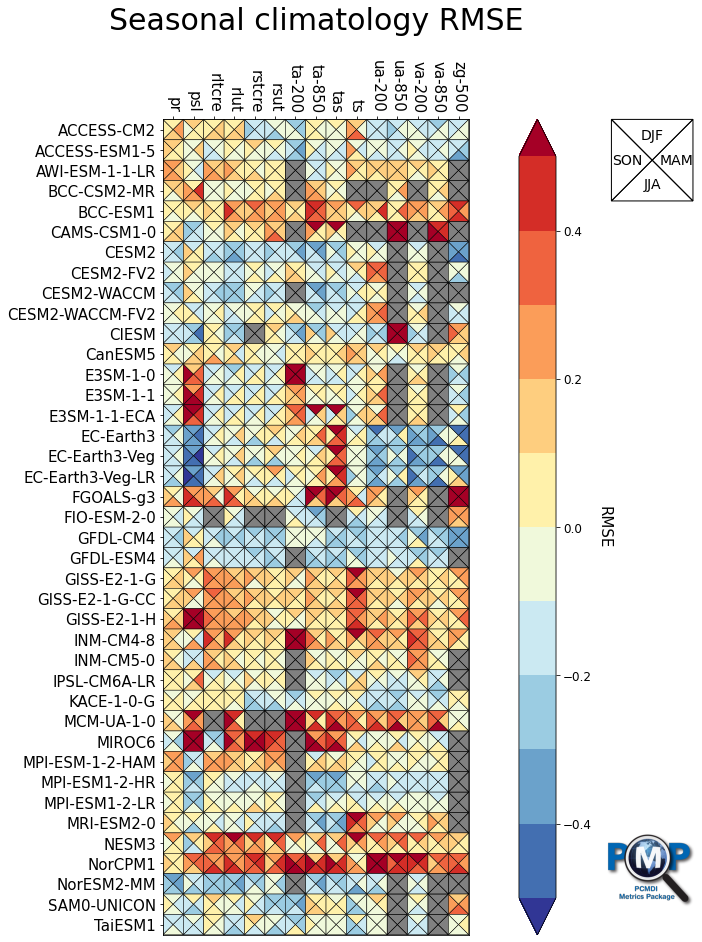

In [13]:
fig, ax, cbar = portrait_plot(data_all_nor,
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbar_label='RMSE',
                              box_as_square=True,
                              vrange=(-0.5, 0.5),
                              figsize=(18, 15),
                              cmap='RdYlBu_r',
                              cmap_bounds=[-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5],
                              cbar_kw={"extend": "both"},
                              missing_color='grey',
                              legend_on=True,
                              legend_labels=['DJF', 'MAM', 'JJA', 'SON'],
                              legend_box_xy=(22, 0),
                              legend_box_size=4,
                              logo_rect = [0.85, 0.15, 0.07, 0.07]
                             )
ax.set_xticklabels(xaxis_labels, rotation=-90, va='center', ha="right")

# Add title
ax.set_title("Seasonal climatology RMSE", fontsize=30, pad=30)

## 3.3 Portrait Plot with 2 Triangles (2 seasons)

Text(0.5, 1.0, 'Seasonal climatology RMSE')

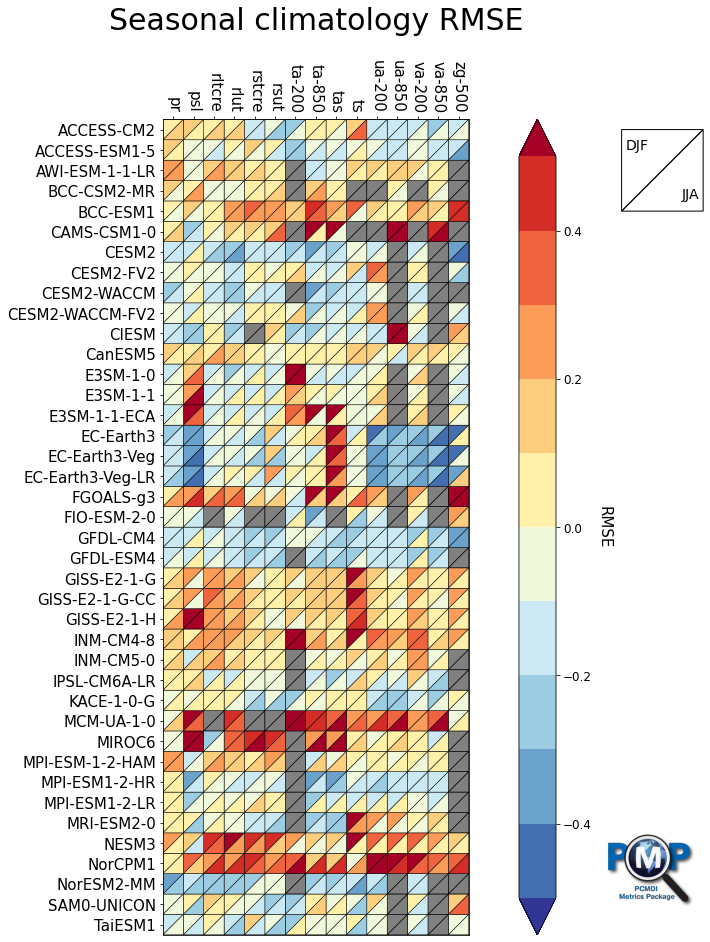

In [14]:
fig, ax, cbar = portrait_plot([data_djf_nor, data_jja_nor],
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbar_label='RMSE',
                              box_as_square=True,
                              vrange=(-0.5, 0.5),
                              figsize=(18, 15),
                              cmap='RdYlBu_r',
                              cmap_bounds=[-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5],
                              cbar_kw={"extend": "both"},
                              missing_color='grey',
                              legend_on=True,
                              legend_labels=['DJF', 'JJA'],
                              legend_box_xy = (22, 0),
                              legend_box_size=4,
                              logo_rect = [0.85, 0.15, 0.07, 0.07]
                             )
ax.set_xticklabels(xaxis_labels, rotation=-90, va='center', ha="right")

# Add title
ax.set_title("Seasonal climatology RMSE", fontsize=30, pad=30)

## 3.3 Portrait Plot without Triangles (1 season)

Text(0.5, 1.0, 'Seasonal climatology RMSE: DJF')

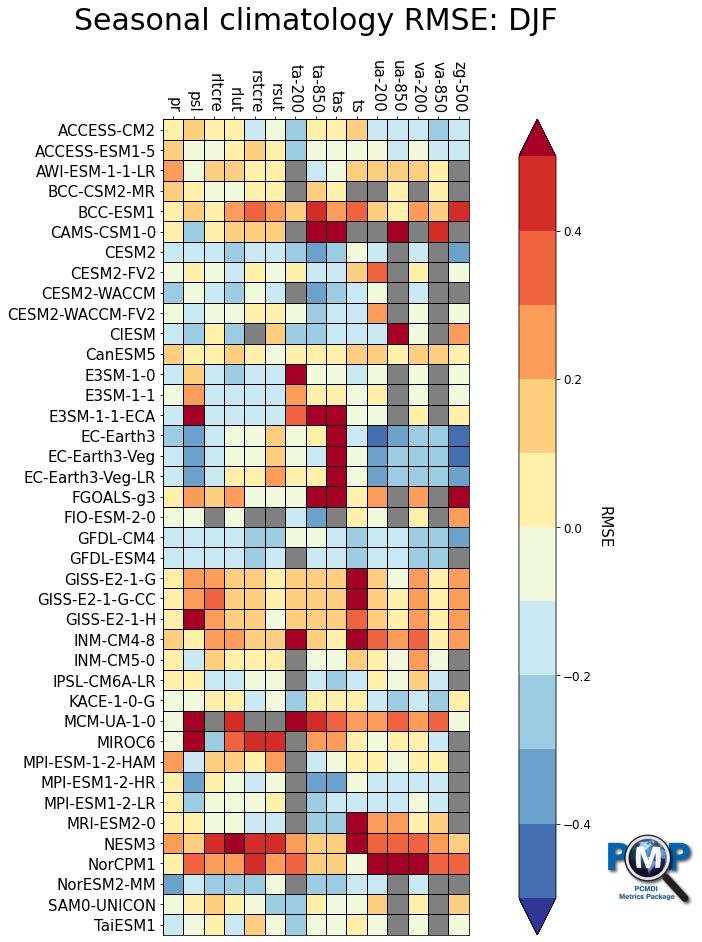

In [15]:
fig, ax, cbar = portrait_plot([data_djf_nor],
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbar_label='RMSE',
                              box_as_square=True,
                              vrange=(-0.5, 0.5),
                              figsize=(18, 15),
                              cmap='RdYlBu_r',
                              cmap_bounds=[-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5],
                              cbar_kw={"extend": "both"},
                              missing_color='grey',
                              logo_rect = [0.85, 0.15, 0.07, 0.07]
                             )
ax.set_xticklabels(xaxis_labels, rotation=-90, va='center', ha="right")

# Add title
ax.set_title("Seasonal climatology RMSE: DJF", fontsize=30, pad=30)